In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numpy.random import seed
from scipy.stats import kruskal

from termcolor import colored

In [2]:
def define_plot_pos(ax):
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(0,6)
    plt.legend()
    plt.show()

In [3]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [6, 3],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

# Plots for the haptics experiment

In [4]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

In [5]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [6]:
path_to_folder = "/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/"
subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()
subjects

['/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub10_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub10_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub2_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub2_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub3_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub3_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub4_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Ha

In [7]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

In [15]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
#     subject = '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub9_MotionCapture/'
    print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
        print('wrong number of experiments!')
        break
    for file in files:
        print(file)
        logs[subject].append(dfFromJSON(file))

/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub10_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub10_Controller/Haptics_GoThroughY_2019_08_28_15_20_39.json
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub10_Controller/Haptics_GoThroughY_2019_08_28_15_20_57.json
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub10_Controller/Haptics_GoThroughY_2019_08_28_15_21_11.json
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub10_Controller/Haptics_GoThroughY_2019_08_28_15_21_28.json
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_Y/sub10_Controller/Haptics_GoThroughY_2019_08_28_15_21_43.json
/Volumes/GoogleDrive/My Drive/Matteo/EPFL

In [16]:
fields = ['first motion', 'last motion', 'first remote', 'last remote']
interfaces = ['motion', 'remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Motion' in x]

t = [logs[x] for x in sub_motion]
logs['motion'] = []
for i in t:
    for j in i:
        logs['motion'].append(j)

t = [logs[x] for x in sub_remote]
logs['remote'] = []
for i in t:
    for j in i:
        logs['remote'].append(j)

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]

1971

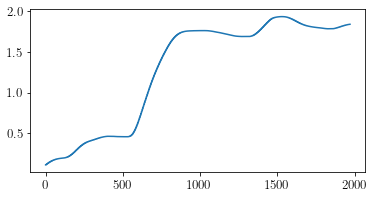

In [17]:
# logs['first motion'][1] = logs['first motion'][1].iloc[:3800]

# test = logs['first motion'][1].drop([logs['first motion'][1].index[3800] , logs['first motion'][1].index[len(logs['first motion'][1])]])

plt.plot(logs['first motion'][1]['dronePosition.x'])


len(logs['first motion'][1])

# %store logs

In [18]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print('p = ', p, str_from_p(p))
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print('p = ', p, str_from_p(p))
            
    return var

def runHapticsAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in interfaces:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                print_p(p)
                
    return var

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)

In [19]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

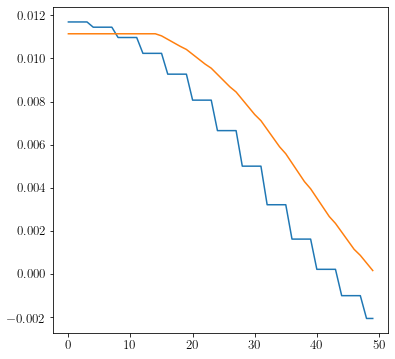

In [23]:
logs1 = logs.copy()

logs1['first motion'][0]['dronePositionFiltered.x'] = running_average(logs1['first motion'][0]['dronePosition.x'], 15)

plt.figure(figsize=(6,6))

plt.plot(logs1['first motion'][0]['dronePosition.x'][0:50])
plt.plot(logs1['first motion'][0]['dronePositionFiltered.x'][0:50])

# Plot Trajectories

2290
1971
2022
432
2152
1789
1577
789
2775
3245
2219
60936
916
1414
2349
1418
1619
1564
797
1336
2865
1619
1301
1290
1835
916
2005
974
1331
2322
1233
1128
2184
1855
1778
1190


1971

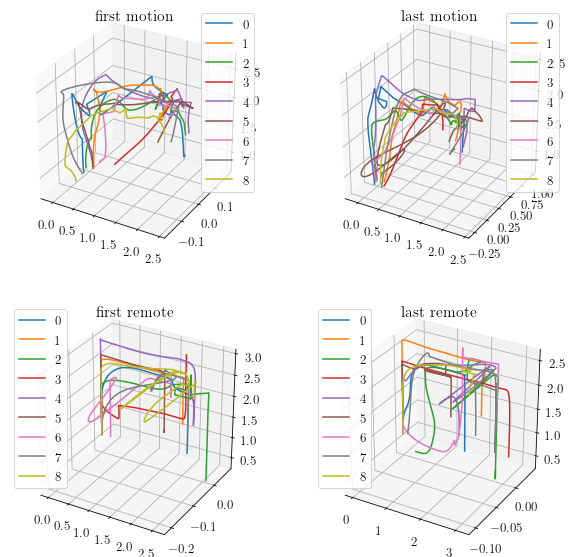

In [28]:

params = {
    'figure.figsize': [10, 10],
   }
mpl.rcParams.update(params)

plt.figure()

for idx,i in enumerate(fields):
    ax = plt.subplot(2, 2, 1+idx, projection='3d')
    for idx1,log in enumerate(logs[i]):
        ax.plot(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], label = str(idx1))
        print(len(log))
    plt.legend()
    plt.title(fields[idx])
#     define_plot_pos(ax)
len(logs['first motion'][1])

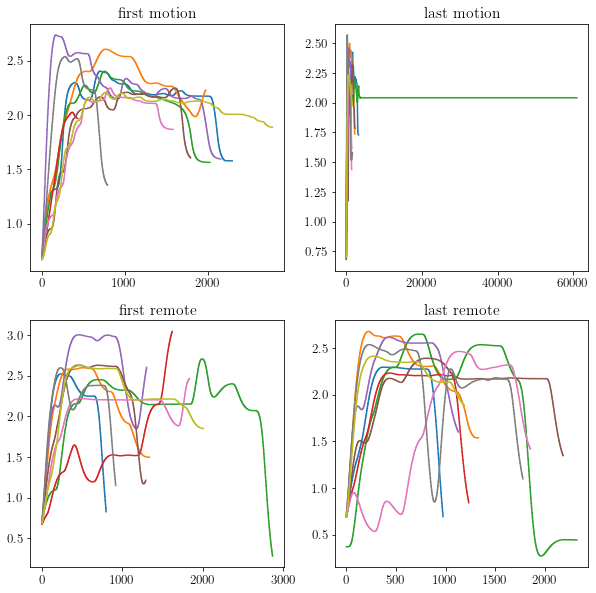

In [33]:
plt.figure()

for idx,i in enumerate(fields):
    ax = plt.subplot(2, 2, 1+idx)
    for idx1,log in enumerate(logs[i]):
        ax.plot(log['dronePosition.y'])
    plt.title(fields[idx])

# Time analysis

In [26]:
def compTime(df):
    return df['absoluteTime'].iloc[-1] - df['absoluteTime'].iloc[0]

In [27]:
time = runBasicAnalysis(compTime)

first motion
[28.649944305419922, 24.625800132751465, 25.264503479003906, 5.387521743774414, 26.888071060180664, 22.351208686828613, 19.700337409973145, 9.877029418945312, 34.67607498168945]
mean =  21.93561013539632
std =  8.658104840090244

last motion
[40.601287841796875, 27.728118896484375, 543.729736328125, 11.437896728515625, 17.663665771484375, 29.352088928222656, 17.726730346679688, 19.064971923828125, 19.538848876953125]
mean =  80.76037173800998
std =  163.88446233830376

first remote
[9.950272560119629, 16.689370155334473, 35.801780700683594, 20.225828170776367, 16.25072956085205, 16.113847732543945, 22.938923835754395, 11.452423095703125, 25.050647735595703]
mean =  19.385980394151474
std =  7.413785789851415

last remote
[12.163619995117188, 16.626541137695312, 29.01397705078125, 15.400901794433594, 14.088851928710938, 27.290252685546875, 23.176742553710938, 22.214157104492188, 14.86419677734375]
mean =  19.42658233642578
std =  5.789774587039535

first motion last motion


In [ ]:
basic_plot(time)

# Distance Analysis

In [ ]:
def compDist(df):
    
    steps = 10
    
    df['dronePositionFiltered.x'] = running_average(df['dronePosition.x'], steps)
    df['dronePositionFiltered.y'] = running_average(df['dronePosition.y'], steps)
    df['dronePositionFiltered.z'] = running_average(df['dronePosition.z'], steps)
    
    x = df['dronePositionFiltered.x'].values
    y = df['dronePositionFiltered.y'].values
    z = df['dronePositionFiltered.z'].values

    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)

    dd = np.sqrt(dx**2+dy**2+dz**2)
    d = np.sum(dd)

    return d

In [ ]:
dist = runBasicAnalysis(compDist)

In [ ]:
basic_plot(dist)

# Velocity Analysis

In [ ]:
def compVel(df):
    x = df['dronePositionFiltered.x'].values
    y = df['dronePositionFiltered.y'].values
    z = df['dronePositionFiltered.z'].values
    t = df['absoluteTime'].values

    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)
    dt = np.diff(t)
    
    vx = np.append([0],dx/dt)
    vy = np.append([0],dy/dt)
    vz = np.append([0],dz/dt)
    
    df['droneVelocity.x'] = vx
    df['droneVelocity.y'] = vy
    df['droneVelocity.z'] = vz
    
    steps = 20    
    
    df['droneVelocityFiltered.x'] = running_average(df['droneVelocity.x'], steps)
    df['droneVelocityFiltered.y'] = running_average(df['droneVelocity.y'], steps)
    df['droneVelocityFiltered.z'] = running_average(df['droneVelocity.z'], steps)

    dv = np.sqrt(df['droneVelocityFiltered.x'][100:]**2+df['droneVelocityFiltered.y'][100:]**2+df['droneVelocityFiltered.z'][100:]**2)
    
    v = np.mean(dv)
    
    return v

In [ ]:
vel = runBasicAnalysis(compVel)

In [ ]:
basic_plot(vel)

# Acceleration Analysis

In [ ]:
def compAcc(df):
    vx = df['droneVelocityFiltered.x'].values
    vy = df['droneVelocityFiltered.y'].values
    vz = df['droneVelocityFiltered.z'].values
    t = df['absoluteTime'].values
    
    dvx = np.diff(vx)
    dvy = np.diff(vy)
    dvz = np.diff(vz)
    dt = np.diff(t)
    
    ax = np.append([0],dvx/dt)
    ay = np.append([0],dvy/dt)
    az = np.append([0],dvz/dt)
    
    df['droneAcceleration.x'] = ax
    df['droneAcceleration.y'] = ay
    df['droneAcceleration.z'] = az
    
    steps = 30    
    
    df['droneAccelerationFiltered.x'] = running_average(df['droneAcceleration.x'], steps)
    df['droneAccelerationFiltered.y'] = running_average(df['droneAcceleration.y'], steps)
    df['droneAccelerationFiltered.z'] = running_average(df['droneAcceleration.z'], steps)

    da = np.sqrt(df['droneAccelerationFiltered.x'][100:]**2+df['droneAccelerationFiltered.y'][100:]**2+df['droneAccelerationFiltered.z'][100:]**2)
    
    a = np.mean(da)

    return a

In [ ]:
acc = runBasicAnalysis(compAcc)

In [ ]:
basic_plot(acc)

# Jerk Analysis

In [ ]:
def compJerk(df):
    ax = df['droneAccelerationFiltered.x'].values
    ay = df['droneAccelerationFiltered.y'].values
    az = df['droneAccelerationFiltered.z'].values
    t = df['absoluteTime'].values
    
    dax = np.diff(ax)
    day = np.diff(ay)
    daz = np.diff(az)
    dt = np.diff(t)
    
    jx = np.append([0],dax/dt)
    jy = np.append([0],day/dt)
    jz = np.append([0],daz/dt)
    
    df['droneJerk.x'] = jx
    df['droneJerk.y'] = jy
    df['droneJerk.z'] = jz
    
    steps = 40    
    
    df['droneJerkFiltered.x'] = running_average(df['droneJerk.x'], steps)
    df['droneJerkFiltered.y'] = running_average(df['droneJerk.y'], steps)
    df['droneJerkFiltered.z'] = running_average(df['droneJerk.z'], steps)

    dj = np.sqrt(df['droneJerkFiltered.x'][100:]**2+df['droneJerkFiltered.y'][100:]**2+df['droneJerkFiltered.z'][100:]**2)
    
    
    j = np.mean(dj)

    return j

In [ ]:
jerk = runBasicAnalysis(compJerk)

In [ ]:
basic_plot(jerk)

# Energy Analysis

In [ ]:
def compEnergy(df):
    df['controlInput'] = np.sqrt(df['controlSpeed.x']**2+df['controlSpeed.y']**2+df['controlSpeed.z']**2)
    return df['controlInput'].sum()

In [ ]:
energy = runBasicAnalysis(compEnergy)

In [ ]:
basic_plot(energy)

# Power Analysis

In [ ]:
def compDEnergy(df):
    dEnergy = np.abs(np.diff(df['controlInput']))
    return np.sum(dEnergy)

In [ ]:
dEnergy = runBasicAnalysis(compDEnergy)

In [ ]:
size = 6

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.bar([0, 1, 2, 3],
   dEnergy['means'],
   yerr=dEnergy['stds'])

plt.xticks(range(4), fields, rotation = 10)

ax = fig.add_subplot(122)
ax.bar([0, 1],
   [np.mean(dEnergy['diff mot']), np.mean(dEnergy['diff rem'])],
   yerr=[np.std(dEnergy['diff mot']), np.std(dEnergy['diff rem'])])

# Collision Analysis

In [34]:
coll_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Bidir - haptics ZY collisions - Sheet1.csv')
coll_df

,Index,Run,Subject,Interface,Collided Z,Collided Y
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,96.0,1.0,10.0,Remote,1.0,0.0
96,97.0,2.0,10.0,Remote,0.0,0.0
97,98.0,3.0,10.0,Remote,1.0,1.0
98,99.0,4.0,10.0,Remote,1.0,1.0


In [35]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]
# logs['last motion'] = [logs[x][-1] for x in sub_motion]
# logs['first remote'] = [logs[x][0] for x in sub_remote]
# logs['last remote'] = [logs[x][-1] for x in sub_remote]
print(coll['motion'])
print(coll['remote'])

    Index  Run  Subject Interface  Collided Z  Collided Y
10   11.0  1.0      2.0    Motion         1.0         1.0
11   12.0  2.0      2.0    Motion         1.0         1.0
12   13.0  3.0      2.0    Motion         0.0         1.0
13   14.0  4.0      2.0    Motion         0.0         0.0
14   15.0  5.0      2.0    Motion         0.0         0.0
20   21.0  1.0      3.0    Motion         0.0         0.0
21   22.0  2.0      3.0    Motion         1.0         1.0
22   23.0  3.0      3.0    Motion         0.0         0.0
23   24.0  4.0      3.0    Motion         0.0         0.0
24   25.0  5.0      3.0    Motion         0.0         1.0
30   31.0  1.0      4.0    Motion         0.0         1.0
31   32.0  2.0      4.0    Motion         0.0         0.0
32   33.0  3.0      4.0    Motion         1.0         1.0
33   34.0  4.0      4.0    Motion         0.0         1.0
34   35.0  5.0      4.0    Motion         0.0         1.0
40   41.0  1.0      5.0    Motion         0.0         0.0
41   42.0  2.0


consider all runs

motion =  [3.0, 2.0, 4.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0]
remote =  [3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0]

std motion =  0.816496580927726
mean remote =  2.5555555555555554
std remote =  0.8314794192830981

total motion =  21.0
total remote =  23.0

p = 0.5087764159758276

consider first runs

motion =  [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0]
remote =  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]

std motion =  0.4969039949999533
mean remote =  0.4444444444444444
std remote =  0.4969039949999533

total motion =  5.0
total remote =  4.0

p = 0.6468641853669347

consider last runs

motion =  [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
remote =  [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]

std motion =  0.4714045207910317
mean remote =  0.6666666666666666
std remote =  0.4714045207910317

total motion =  3.0
total remote =  6.0

p = 0.1693272972120591


Text(0.5, 1.0, 'Collisions - last run')

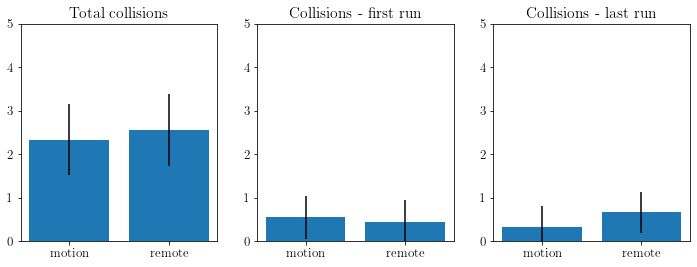

In [38]:
def compute_mean_std_collisions(data_m, data_r):
    
    coll_per_sub_m = []
    
    for sub in np.unique(data_m['Subject']):
        sub_coll = data_m[data_m['Subject']==sub]
        
        coll_per_sub_m.append(sub_coll['Collided Y'].sum())
        
    coll_per_sub_r = []
    
    for sub in np.unique(data_r['Subject']):
        sub_coll = data_r[data_r['Subject']==sub]
        
        coll_per_sub_r.append(sub_coll['Collided Y'].sum())
    
    mean_m = np.mean(coll_per_sub_m)
    std_m = np.std(coll_per_sub_m)
    mean_r = np.mean(coll_per_sub_r)
    std_r = np.std(coll_per_sub_r)

    print('motion = ', coll_per_sub_m)
    print('remote = ', coll_per_sub_r)
    print('')
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('')
    print('total motion = ', np.sum(coll_per_sub_m))
    print('total remote = ', np.sum(coll_per_sub_r))
    print('')

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_r)

    print_p(p)
    
    return [coll_per_sub_m, coll_per_sub_r]

print('')
print('consider all runs')
print('')
all_m, all_r = compute_mean_std_collisions(coll['motion'], coll['remote'])
    
print('')
print('consider first runs')
print('')
first_m, first_r = compute_mean_std_collisions(coll['first motion'], coll['first remote'])
    
print('')
print('consider last runs')
print('')
last_m, last_r = compute_mean_std_collisions(coll['last motion'], coll['last remote'])


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1],
   [np.mean(all_m), np.mean(all_r)],
      yerr = [np.std(all_m), np.std(all_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1],
   [np.mean(first_m), np.mean(first_r)],
      yerr = [np.std(first_m), np.std(first_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1],
   [np.mean(last_m), np.mean(last_r)],
      yerr = [np.std(last_m), np.std(last_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')
plt.title('Collisions - last run')

# Approach wall Analysis

In [ ]:
def comp_max_dist(df):
    
    return np.max(df['dronePosition.x'])

In [ ]:
x_max = runHapticsAnalysis(comp_max_dist)

In [ ]:
dist_obstacle = 2.5
collider = 0.07

x_collision = dist_obstacle - collider

In [ ]:
distances = {}

for i in interfaces:
    distances[i] = x_collision - np.array(x_max[i])
    distances[i] = distances[i][np.where(distances[i]>0)]
    
print()
            
for idx,i in enumerate(interfaces):
    for j in interfaces[idx+1:]:
        if i != j:

            t, p = t_test_kruskal(distances[i],distances[j])

            print (i,j)
            print_p(p)
        
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1],
   [np.mean(distances['motion']), np.mean(distances['remote'])],
      yerr = [np.std(distances['motion']), np.std(distances['remote'])])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 1])
plt.title('Distances')

# TEST

In [ ]:
plt.figure()
l = 5000

inter = 'first motion'
inter2 = 'first remote'

sc = len(logs[inter][0]['dronePositionFiltered.x'][0:l])/len(logs[inter2][0]['dronePositionFiltered.x'][0:l])

# plt.plot(logs[inter][0]['dronePosition.x'][0:l])
plt.plot(logs[inter][0]['dronePositionFiltered.x'][0:l])
plt.plot(np.arange(0,len(logs[inter2][0]['dronePositionFiltered.x'][0:l]))*sc, logs[inter2][0]['dronePositionFiltered.x'][0:l])
plt.grid(True)

# print(logs['first remote'][0]['dronePosition.x'][0:500])

plt.figure()
# plt.plot(logs[inter][0]['droneVelocity.x'][0:l])
plt.plot(logs[inter][0]['droneVelocityFiltered.x'][0:l])
plt.plot(np.arange(0,len(logs[inter2][0]['dronePositionFiltered.x'][0:l]))*sc, logs[inter2][0]['droneVelocityFiltered.x'][0:l])
plt.yticks([-1, 0, 1])
plt.grid(True)

plt.figure()
# plt.plot(logs[inter][0]['droneAcceleration.x'][0:l])
plt.plot(logs[inter][0]['droneAccelerationFiltered.x'][0:l])
plt.plot(np.arange(0,len(logs[inter2][0]['dronePositionFiltered.x'][0:l]))*sc, logs[inter2][0]['droneAccelerationFiltered.x'][0:l])
plt.yticks([-1, 0, 1])
plt.grid(True)

plt.figure()
# plt.plot(logs[inter][0]['droneJerk.x'][0:l])
plt.plot(logs[inter][0]['droneJerkFiltered.x'][0:l])
plt.plot(np.arange(0,len(logs[inter2][0]['dronePositionFiltered.x'][0:l]))*sc, logs[inter2][0]['droneJerkFiltered.x'][0:l])
plt.grid(True)

In [ ]:
x_max

In [ ]:
i